In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
from pmdarima import auto_arima

In [13]:
df= pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\co2_mm_mlo.csv')

In [15]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [17]:
df['date'] = pd.to_datetime({'year' : df['year'], 'month' : df['month'], 'day' : 1})

In [19]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [23]:
df = df.set_index('date')

In [25]:
df.index.freq = 'MS'

In [27]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<Axes: xlabel='date'>

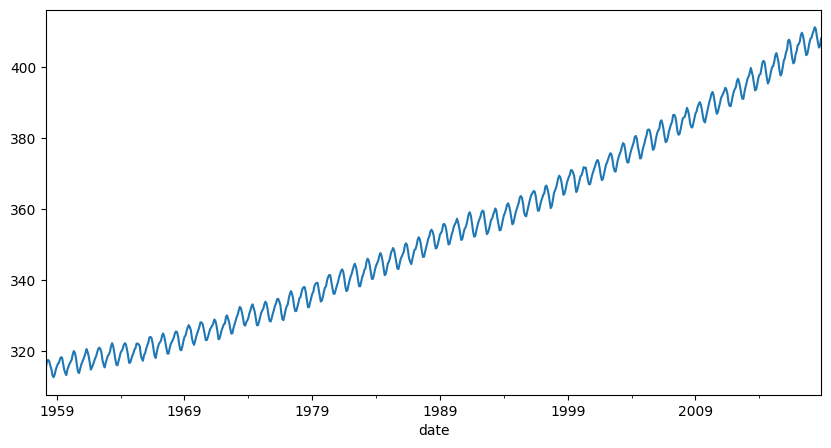

In [33]:
df['interpolated'].plot(figsize=(10,5))

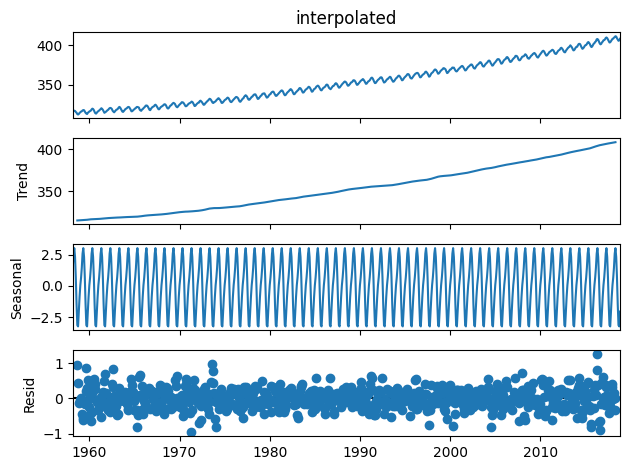

In [37]:
result = seasonal_decompose(df['interpolated'], model = 'add')
result.plot();

<Axes: xlabel='date'>

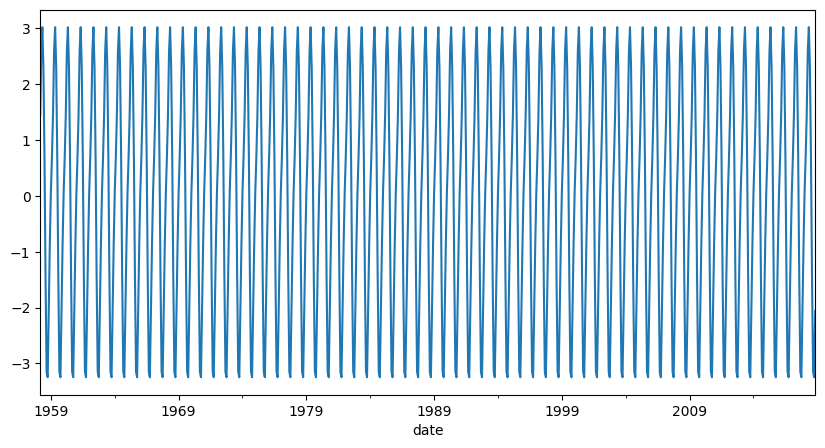

In [39]:
result.seasonal.plot(figsize=(10,5))

La saisonnalité se répète chaque années

In [44]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()     #  12 pour l'année de chaque année

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.263
Date:                            Fri, 14 Mar 2025   AIC                            424.526
Time:                                    12:55:12   BIC                            452.067
Sample:                                03-01-1958   HQIC                           435.153
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3527      0.059      5.969      0.000       0.237       0.468
ar.L2          0.0876      0.026      3.313      0.001       0.036       0.139
ma.L1         -0.7078      0.051    -13.900      0.000      -0.808      -0.608
ar.S.L12       0.9996      0.000   2774.408      0.000       0.999       1.000
ma.S.L12      -0.8650      0.022    -40.048      0.000      -0.907      -0.823
sigma2         0.0958      0.005     20.304      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
len(df)

729

In [48]:
train = df.iloc[:717]
test = df.iloc[717:]

In [50]:
model = SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12))

In [52]:
results = model.fit()

C:\Users\nico_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.906
Date:                            Fri, 14 Mar 2025   AIC                            415.813
Time:                                    13:03:54   BIC                            443.255
Sample:                                03-01-1958   HQIC                           426.409
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3521      0.091      3.871      0.000       0.174       0.530
ar.L2          0.0853      0.053      1.607      0.108      -0.019       0.189
ma.L1         -0.7060      0.089     -7.954      0.000      -0.880      -0.532
ar.S.L12       0.9996      0.000   2715.135      0.000       0.999       1.000
ma.S.L12      -0.8636      0.023    -37.519      0.000      -0.909      -0.818
sigma2         0.0954      0.005     20.320      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.56
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ar.L2 a une p-value de 0.108 donc supérieure à 0.05. Nous allons tester sans ce paramètre

In [56]:
model = SARIMAX(train['interpolated'], order=(1,1,1), seasonal_order=(1,0,1,12))

In [58]:
results = model.fit()

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -202.953
Date:                            Fri, 14 Mar 2025   AIC                            415.907
Time:                                    13:06:36   BIC                            438.775
Sample:                                03-01-1958   HQIC                           424.738
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2319      0.060      3.884      0.000       0.115       0.349
ma.L1         -0.5782      0.054    -10.713      0.000      -0.684      -0.472
ar.S.L12       0.9997      0.000   3315.969      0.000       0.999       1.000
ma.S.L12      -0.8663      0.023    -38.490      0.000      -0.910      -0.822
sigma2         0.0954      0.005     20.400      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 5.08
Prob(Q):                              0.60   Prob(JB):                         0.08
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Selection de SARIMAX(1,1,1)(1,0,1,12) car:
- ar.L2 n'était pas significatif (p-value = 0.108)
- La différence d’AIC est très faible, donc pas de réel impact négatif
- BIC a baissé, ce qui favorise la version plus simple du modèle

In [67]:
start = len(train)
end = len(train) + len(test) -1

In [69]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')    # levels car nous nous intéressons aux  données réelles

<Axes: xlabel='date'>

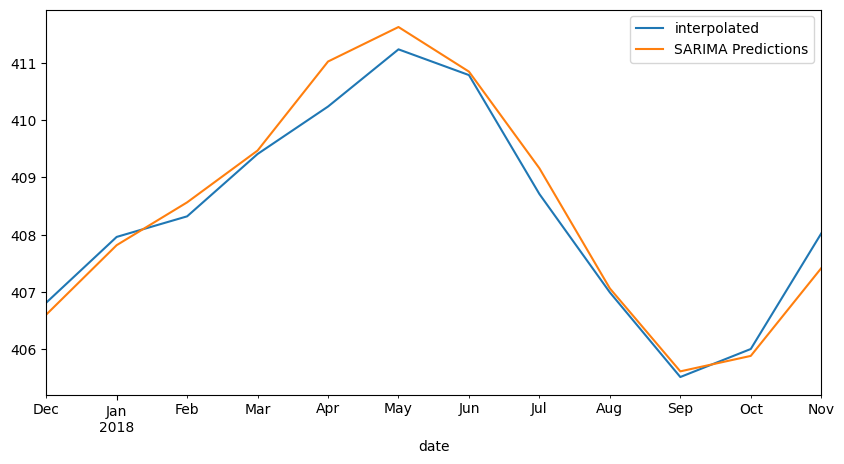

In [73]:
test['interpolated'].plot(legend=True, figsize=(10,5))
predictions.plot(legend=True)

In [75]:
from statsmodels.tools.eval_measures import rmse

In [79]:
error = rmse(test['interpolated'], predictions)
error

0.3540565879938939

In [81]:
test['interpolated'].mean()

408.3333333333333

In [83]:
predictions.mean()

408.42345512888477

### La rmse est très basse et les moyennes des données sont pratiquement identiques

# Forecast into the unknow future

In [105]:
model = SARIMAX(df['interpolated'], order=(1,1,1), seasonal_order=(1,0,1,12))

In [107]:
results = model.fit()

In [108]:
forecast = results.forecast(steps=12)

In [109]:
forecast

2018-12-01    409.254105
2019-01-01    410.397482
2019-02-01    411.079900
2019-03-01    412.006794
2019-04-01    413.465408
2019-05-01    414.121176
2019-06-01    413.385546
2019-07-01    411.643914
2019-08-01    409.594844
2019-09-01    408.140944
2019-10-01    408.440499
2019-11-01    410.038590
Freq: MS, Name: predicted_mean, dtype: float64

## Autre méthode

In [132]:
model = SARIMAX(df['interpolated'], order=(1,1,1), seasonal_order=(1,0,1,12))

In [134]:
results = model.fit()

In [135]:
forecast = results.predict(len(df), len(df) + 11, typ='levels').rename('SARIMA FORECAST')

In [136]:
forecast

2018-12-01    409.254105
2019-01-01    410.397482
2019-02-01    411.079900
2019-03-01    412.006794
2019-04-01    413.465408
2019-05-01    414.121176
2019-06-01    413.385546
2019-07-01    411.643914
2019-08-01    409.594844
2019-09-01    408.140944
2019-10-01    408.440499
2019-11-01    410.038590
Freq: MS, Name: SARIMA FORECAST, dtype: float64

<Axes: xlabel='date'>

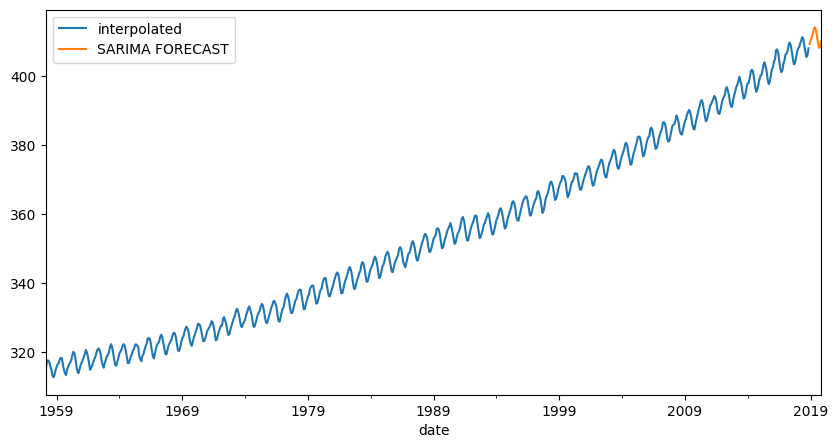

In [142]:
df['interpolated'].plot(legend=True, figsize=(10,5))
forecast.plot(legend=True)